## **Imports**

In [1]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=b38845ba653cda3b443261ed47c792844f2ba2d6a0476ac5c3aa677fa682b366
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [2]:
import librosa   #for audio processing
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

## **Download Dataset**

In [3]:
!git clone https://github.com/getalp/ALFFA_PUBLIC.git

Cloning into 'ALFFA_PUBLIC'...
remote: Enumerating objects: 66024, done.
remote: Total 66024 (delta 0), reused 0 (delta 0), pack-reused 66024
Receiving objects: 100% (66024/66024), 6.54 GiB | 30.44 MiB/s, done.
Resolving deltas: 100% (12337/12337), done.
Checking out files: 100% (56925/56925), done.


**Change Working Directory**

In [4]:
import os
os.chdir("ALFFA_PUBLIC/ASR/AMHARIC/")
len(os.listdir())

sample_rate = 44100

**Load Audio Files**

In [57]:
def load_audio_files(path, sampling_rate, to_mono):
  audio_files = {}
  max_length = 0
  i = 0
  for file in os.listdir(path):
    audio, rate= librosa.load(path+file, sr=sampling_rate, mono = to_mono)
    audio_files[file.split('.')[0]] = audio
    max_length = max(max_length,len(audio))
    i+=1
    if i%20 == 0:
      print('loaded',i,'files')
    if i == 100:
      break
  return audio_files, max_length

audio_files, maximum_length = load_audio_files('data/train/wav/', sample_rate, True)

loaded 20 files
loaded 40 files
loaded 60 files
loaded 80 files
loaded 100 files


**Load Transcripts**

In [58]:
def load_transcripts(filename):
  transcripts = {}
  with open (filename, encoding="utf-8")as f:
    #print(f.readlines()[1])
    for line in f.readlines():
      
      text, filename = line.split("</s>")
      text, filename = text.strip()[3:], filename.strip()[1:-1]
      transcripts[filename] = text
    return transcripts

transcripts = load_transcripts("data/train/trsTrain.txt")

In [60]:
maximum_length

959616

 **Convert to Double Channel**

In [61]:
# def convert_to_double_channel(audios):
#   for name in audios:
#     if len(audios[name].shape) == 1:
#       audios[name] = np.array([audios[name],audios[name]])
#   return audios
# print(audio_files['tr_10027_tr097109'].shape)
# convert_to_double_channel(audio_files)
# print(audio_files['tr_10027_tr097109'].shape)

**Resize Audios For Double Channel**

In [62]:
# def resize_audios_double(audios,max_length):
#   for name in audios:
#     audios[name] = np.pad(audios[name], ((0,0),(0,max_length-audios[name].shape[1])), 'constant')
#   return audios

**Resize Audios For Mono Channel**

In [63]:
def resize_audios_mono(audios, max_length):
  for name in audios:
    audios[name] = np.pad(audios[name], (0,max_length-len(audios[name])), 'constant')
  return audios

resize_audios_mono(audio_files, maximum_length)
print(audio_files['tr_10027_tr097109'].shape)

(959616,)


**Augment Audios**

In [64]:
def augment_audio(audios, sample_rate):
  for name in audios:
    audios[name] = np.roll(audios[name], int(sample_rate/10))
  return audios
augment_audio(audio_files, 44100)['tr_10027_tr097109'].shape

(959616,)

**Extract Features**

In [65]:
def extract_features(audios, sample_rate):
  mfcc_features = {}
  for audio in audios:
    mfcc_features[audio] = librosa.feature.mfcc(audios[audio], sr=sample_rate)
  return mfcc_features

mfcc_features = extract_features(audio_files, sample_rate)

**Plot MFCCs**

(20, 849)


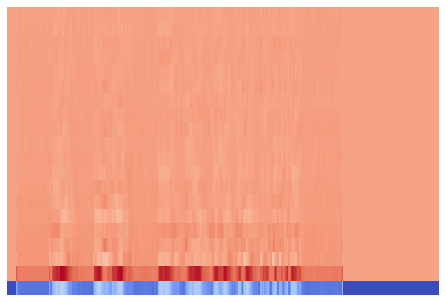

In [53]:
# MFCC
fig, ax = plt.subplots()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
mfccs = mfcc_features[list(mfcc_features.keys())[32]]
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=44100, x_axis='time')
plt.savefig(f'../../../{list(mfcc_features.keys())[77]}.png', dpi = 100)

**Save MFCC Images**

In [76]:
#!mkdir ../../../mfcc_train
def save_mfcc_spectrograms(mfccs: dict, path: str):
  for audio in mfccs:
    # MFCC
    fig, ax = plt.subplots()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    librosa.display.specshow(mfccs[audio], sr=44100, x_axis='time')
    plt.savefig(path+f'{audio}.png', dpi = 100)
    fig.clear()

save_mfcc_spectrograms(mfcc_features, '../../../mfcc_train/')


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

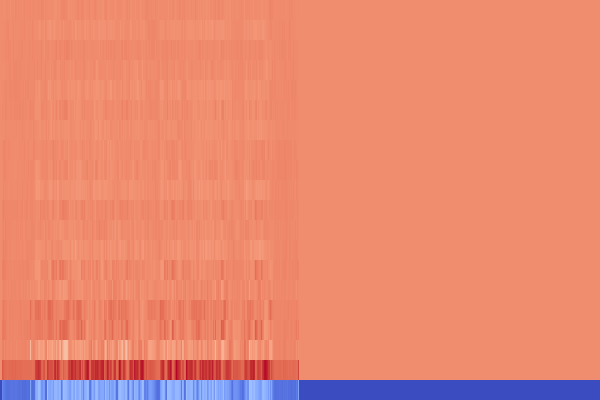

In [77]:
ipd.Image(filename=f'../../../mfcc_train/{list(mfcc_features.keys())[17]}.png')

In [78]:
len(audio_files)

100

Transformed Audio

In [79]:
ipd.Audio(audio_files['tr_10027_tr097109'], rate=sample_rate)

In [80]:
print("The longest audio is",maximum_length/sample_rate, 'seconds long')

The longest audio is 21.76 seconds long


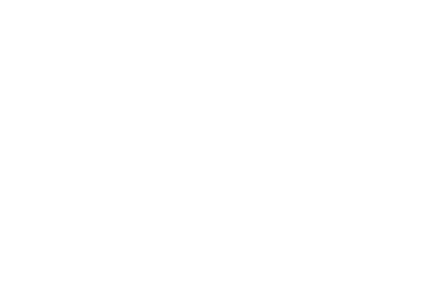